<a href="https://colab.research.google.com/github/Daffaaq/PCVK_Genap_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : Daffa Aqila Rahmatullah

NIM : 2041720098

Kelas TI 3G

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


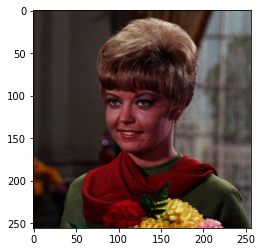

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/female.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

# Tugas Praktikum

## Nomer 1

Gamma Correction Pada Citra
Masukkan Nilai Gamma : 3


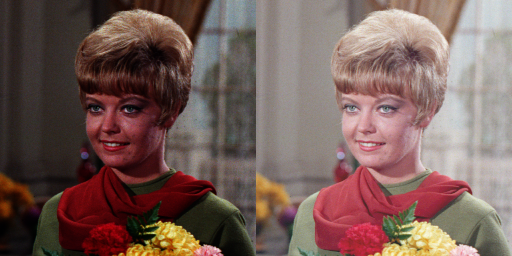

In [3]:
print('Gamma Correction Pada Citra')
print('===========================')
try :
  gamma = int(input('Masukkan Nilai Gamma : '))
except ValueError:
  print('Error, not a number');

original = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

#Melakukan Akses Per Piksel dengan 3 Looping

for x in range(original.shape[0]):
  for y in range(original.shape[1]):
    for z in range(original.shape[2]):
     gamma_image[x,y,z] = np.clip(255 * pow(original[x,y,z]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)  

## Nomer 2

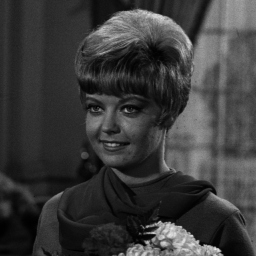

In [4]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/female.tiff', cv.IMREAD_GRAYSCALE)
original = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
cv2_imshow(img)

 Bit Depth Pada Citra 


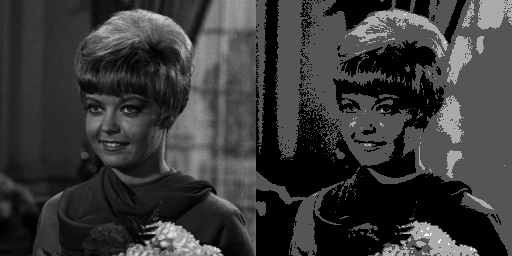

In [5]:
print(' Bit Depth Pada Citra ')
print('======================')

bit_depth=2
level = 255 / (pow(2,bit_depth)-1) 

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);
depth_image = np.zeros(original.shape, original.dtype) 
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

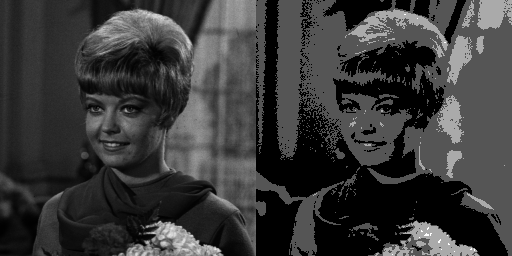

In [27]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1) 
original2 = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/female.tiff', cv.IMREAD_GRAYSCALE) 
depth_image = np.zeros(original2.shape, original2.dtype)
 
depth_image = np.array(np.round((original2/level))*level, dtype='uint8')

final_frame2 = cv.hconcat((original2, depth_image))
cv2_imshow(final_frame2)

## Nomer 3

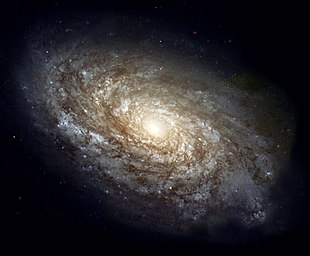

In [6]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/galaxy.jpg')
original= cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
cv2_imshow(img)

Jumlah Citra di Average 5
Nilai MSE adalah 114.41583921370967 (dB)
Nilai PSNR adalah 27.54594210476036 (dB)

Gambar Original                               Gambar Hasil


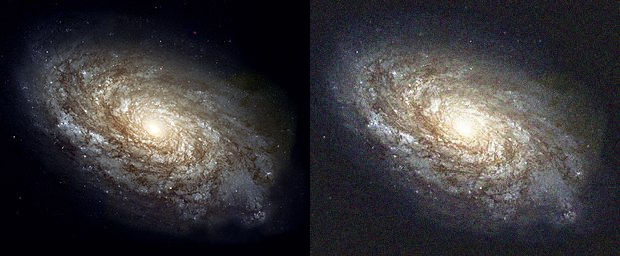

In [7]:
import glob
from math import log10, sqrt
print('Jumlah Citra di Average 5')  
original = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 5
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr,mse

compressed = dst
psnr, mse = PSNR(original, compressed)
print('Nilai MSE adalah',mse,'(dB)')
print('Nilai PSNR adalah',psnr,'(dB)')
print('')
print('Gambar Original                               Gambar Hasil')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Jumlah Citra di Average 30
Nilai MSE adalah 114.96236979166666 (dB)
Nilai PSNR adalah 27.525246532640413 (dB)

Gambar Original                               Gambar Hasil


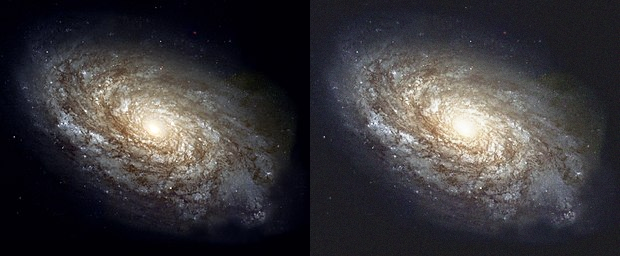

In [8]:
import glob
from math import log10, sqrt

print('Jumlah Citra di Average 30')  
original = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 29 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 5
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr,mse

compressed = dst
psnr, mse = PSNR(original, compressed)
print('Nilai MSE adalah',mse,'(dB)')
print('Nilai PSNR adalah',psnr,'(dB)')
print('')
print('Gambar Original                               Gambar Hasil')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Jumlah Citra di Average 60
Nilai MSE adalah 115.9516591061828 (dB)
Nilai PSNR adalah 27.488033937023985 (dB)

Gambar Original                               Gambar Hasil


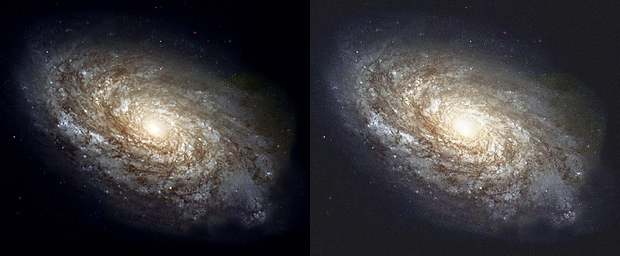

In [9]:
import glob
from math import log10, sqrt

print('Jumlah Citra di Average 60')  
original = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 59 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 5
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr,mse

compressed = dst
psnr, mse = PSNR(original, compressed)
print('Nilai MSE adalah',mse,'(dB)')
print('Nilai PSNR adalah',psnr,'(dB)')
print('')
print('Gambar Original                               Gambar Hasil')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Jumlah Citra di Average 80
Nilai MSE adalah 115.27504200268817 (dB)
Nilai PSNR adalah 27.51345071732853 (dB)

Gambar Original                               Gambar Hasil


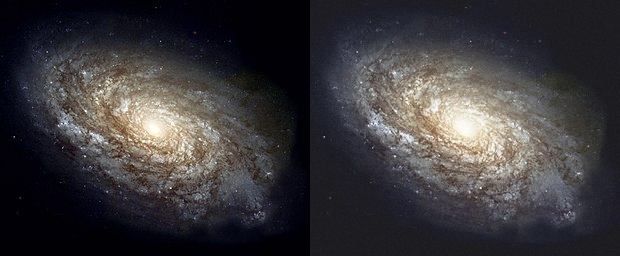

In [10]:
import glob
from math import log10, sqrt

print('Jumlah Citra di Average 80')  
original = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 79 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 5
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr,mse

compressed = dst
psnr, mse = PSNR(original, compressed)
print('Nilai MSE adalah',mse,'(dB)')
print('Nilai PSNR adalah',psnr,'(dB)')
print('')
print('Gambar Original                               Gambar Hasil')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Jumlah Citra di Average 100
Nilai MSE adalah 115.4344968077957 (dB)
Nilai PSNR adalah 27.507447467237107 (dB)

Gambar Original                               Gambar Hasil


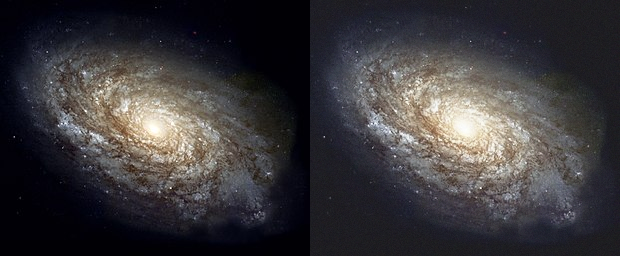

In [11]:
import glob
from math import log10, sqrt

print('Jumlah Citra di Average 100')  
original = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 99 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 5
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr,mse

compressed = dst
psnr, mse = PSNR(original, compressed)
print('Nilai MSE adalah',mse,'(dB)')
print('Nilai PSNR adalah',psnr,'(dB)')
print('')
print('Gambar Original                               Gambar Hasil')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah

Semakin besar nilai PSNR maka akan semakin bagus. Kebalikannya, jika nilai PSNR semakin kecil maka hasilnya semakin buruk pada tampilan citranya. Untuk nilai MSE, semakin besar maka akan akan semakin besar pula perbedaan dua buah citra yang dibandingkan.

## Nomer 4

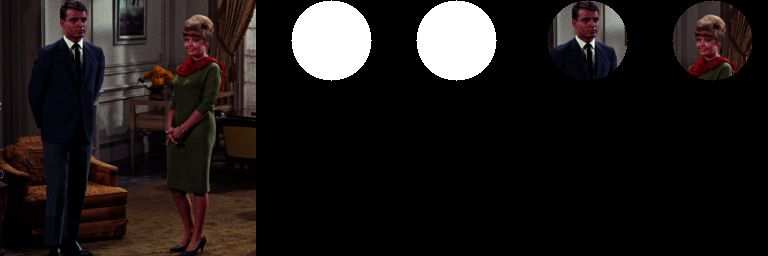

In [12]:
img4 = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/couple.tiff')

mask = np.zeros(img4.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)

result = img4 & mask

mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

result = img4 & mask1

final_frame = cv.hconcat((img4, mask, result))
cv2_imshow(final_frame)

## Nomer 5

### OR

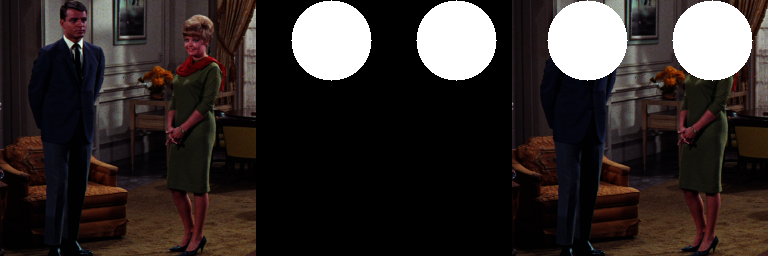

In [29]:
img4 = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/couple.tiff')

mask = np.zeros(img4.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)

result = img4 | mask

mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

result = img4 | mask1

final_frame = cv.hconcat((img4, mask, result))
cv2_imshow(final_frame)

### NOT

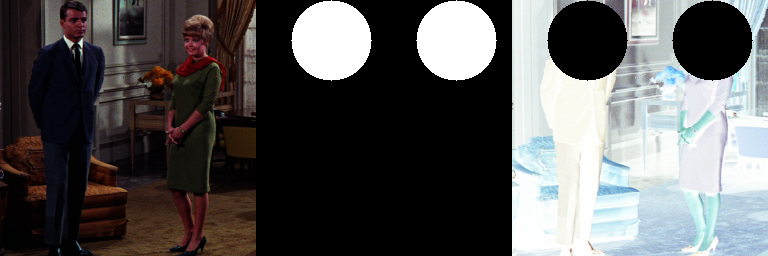

In [30]:
img4 = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/couple.tiff')

mask = np.zeros(img4.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)

result = ~img4 & ~mask

mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

result = ~img4 & ~mask

final_frame = cv.hconcat((img4, mask, result))
cv2_imshow(final_frame)

### NAND

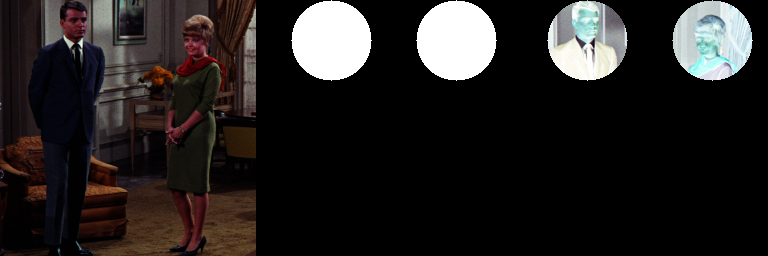

In [31]:
img4 = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/couple.tiff')

mask = np.zeros(img4.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)

result = ~img4 & mask

mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

result = ~img4 & mask

final_frame = cv.hconcat((img4, mask, result))
cv2_imshow(final_frame)

### XOR

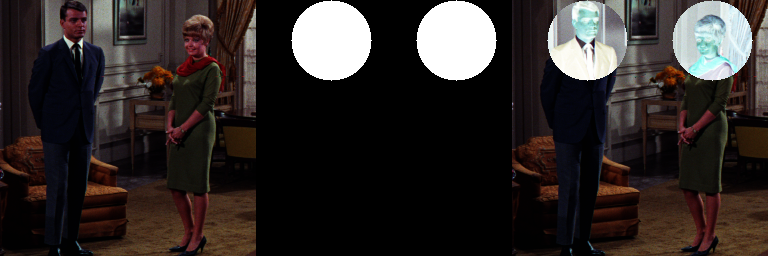

In [32]:
img4 = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/couple.tiff')

mask = np.zeros(img4.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)

result = img4 ^ mask

mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

result = img4 ^ mask

final_frame = cv.hconcat((img4, mask, result))
cv2_imshow(final_frame)

### Tuliskan hasil analisa anda:

Operator logika pada pengolahan citra digunakan untuk melakukan modifikasi citra dengan cara menggabungkan atau memisahkan informasi dari pixel pixel citra.



*   OR akan menambahkan mask di citra
*   NOT akan membuat citra menjadi negative

*   NAND akan menambahkan mask dan membuat citra menjadi negative
*   XOR akan menambahkan mask di gambar flower dan membuat objek di dalam mask menjadi negative



